## Hotel Booking Prediction
### predict whether resort /city hotel reservation will be cancelled

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [63]:
booking_data = pd.read_csv('hotel_bookings.csv')
booking_data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [64]:
#Checking our rows and columns
booking_data.shape

(119390, 32)

In [66]:
#Checking for missing values in the dataset.
booking_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
#Filling the missing data in approprate columns 
booking_data.loc[:,['is_canceled','children','country', 'agent', 'company']].info()
booking_data.country.fillna('-', inplace=True)
booking_data.agent.fillna(0, inplace=True)
booking_data.company.fillna(0, inplace=True)
booking_data.children.fillna(0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   is_canceled  119390 non-null  int64  
 1   children     119386 non-null  float64
 2   country      118902 non-null  object 
 3   agent        103050 non-null  float64
 4   company      6797 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.6+ MB


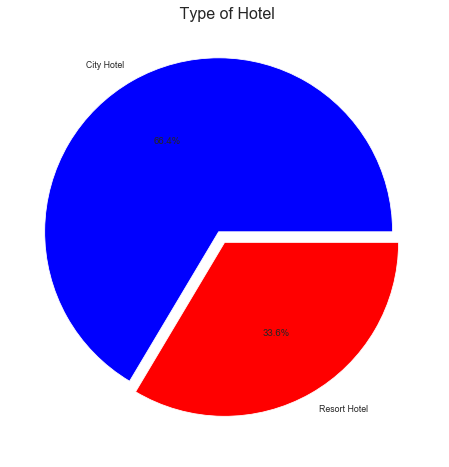

In [67]:
#Hotel Proportion
hotel = booking_data.reset_index().groupby("hotel").aggregate({"hotel": "count"}).rename(columns={'hotel': 'count', 'index': 'hotel'})
hotel = hotel.sort_values('count', ascending=False).reset_index()

plt.figure(figsize=(8, 8))
explode = [0.07,0]
labels = hotel["hotel"]
colors = ['blue', 'Red']
plt.pie(hotel["count"], autopct='%.1f%%', explode=explode, labels=labels, colors=colors)
plt.title(label=" Type of Hotel", fontsize=16)

plt.show()


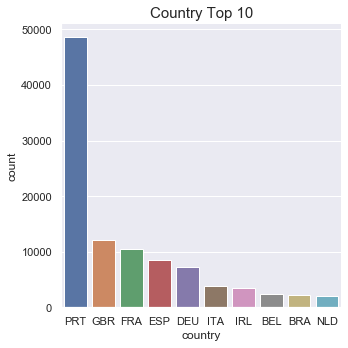

In [8]:
#which country has the highest guest for booking?
where = booking_data["country"].fillna({"country": "unknown"}).reset_index()
where = where.groupby("country").aggregate({"country": "count"})
where = where.rename(columns={'country': 'count', 'index': 'country'}).reset_index().sort_values('count', ascending=False)

sns.set(style='darkgrid')
sns.catplot(x="country", y="count", kind="bar", data=where.head(10))
plt.title(label="Country Top 10", loc="center", fontsize=15)
plt.tight_layout()

plt.show()


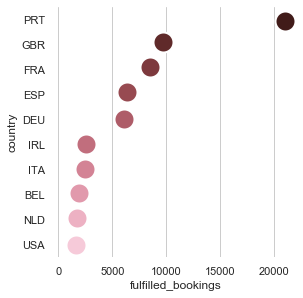

In [9]:
#Counts of country with highest booking
booking_country = pd.DataFrame(booking_data.groupby('country').sum())
booking_country = booking_country.loc[:,['is_canceled','stay_nights','pax']]
booking_country['booking_count'] = booking_data.groupby('country').hotel.count()
booking_country['cancellation_rate'] =  booking_country.is_canceled.div(booking_country.booking_count)
booking_country['fulfillment_rate'] =  1-booking_country.is_canceled.div(booking_country.booking_count)
booking_country['fulfilled_bookings'] =  booking_country['booking_count']-booking_country['is_canceled']
sns.set(style="whitegrid")
toprint = booking_country.reset_index().sort_values(by='fulfilled_bookings', ascending=False).head(10)
g = sns.PairGrid(toprint, x_vars=toprint.columns[7:8], y_vars=['country'], height=4)
sns.despine(left=True, bottom=True)
g.map(sns.stripplot, size=20, orient="h", palette="ch:s=1,r=-.1,h=1_r", linewidth=2, edgecolor="w")
plt.show()

* Overall, 44224 bookings were canceled, accounting for 37 percent of booked stays.


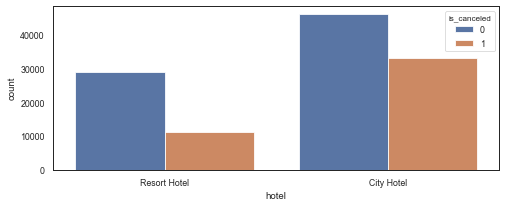

In [70]:
#How many booking was cancelled
booking_data['pax'] = booking_data.children+booking_data.adults
booking_data['stay_nights'] = booking_data.stays_in_week_nights+booking_data.stays_in_weekend_nights
booking_data['bill']=booking_data.stay_nights*booking_data.adr
booking_data['room_assignment'] = booking_data['reserved_room_type']==booking_data['assigned_room_type']
print('* Overall, %2.0f bookings were canceled, accounting for %2.0f percent of booked stays.'
      %(booking_data.is_canceled.sum(), booking_data.is_canceled.mean()*100))
plt.figure(figsize=(8,3))
sns.set_style("white")
sns.countplot(x='hotel', hue='is_canceled', data=booking_data)
plt.show()

Cancellation Financial impact


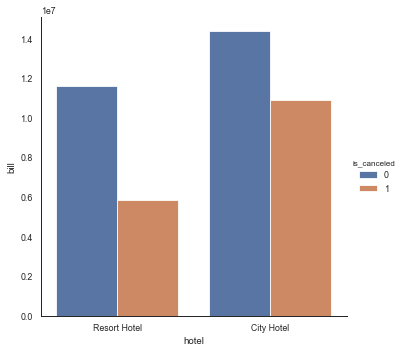

In [72]:
#How does the cancellation affects the financial state of the hotel?
print("Cancellation Financial impact")
sns.catplot(x='hotel', y='bill', hue='is_canceled', estimator=sum, ci=None, kind='bar', data=booking_data)
plt.show()

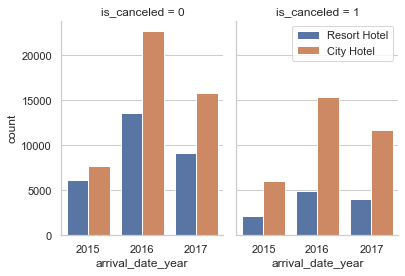

In [10]:
#Cancellation per year

Can_data = booking_data.reset_index()
cancellations = can_data[["hotel", "is_canceled", "arrival_date_year", "arrival_date_month"]]
sns.catplot(x="arrival_date_year", col="is_canceled",
            data=cancellations, hue="hotel", kind="count", height=4, aspect=.7, legend=False)
plt.legend(loc="upper right")

plt.show()


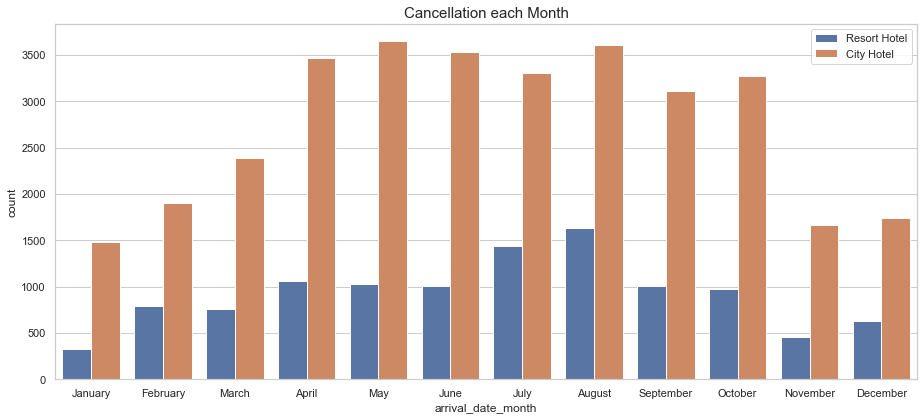

In [11]:
#Cancellation per month

plt.figure(figsize=(13, 6))
data4 = booking_data[booking_data["is_canceled"]==1].reset_index()
cancellations = data4[["hotel", "is_canceled", "arrival_date_year", "arrival_date_month"]]
ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
cancellations["arrival_date_month"] = pd.Categorical(cancellations["arrival_date_month"], categories=ordered_months, ordered=True)

sns.countplot(x="arrival_date_month",  hue="hotel", data=cancellations)
plt.title(label="Cancellation each Month", fontsize=15)
plt.legend(loc="upper right")
plt.tight_layout()

plt.show()



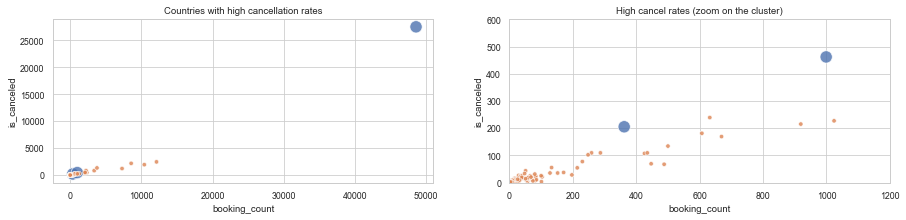

In [75]:
#print(booking_country.quantile(0.75))
booking_country_plot = booking_country
booking_country_plot['hue'] = (booking_country['cancellation_rate']<0.45)|(booking_country['booking_count']<100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,3))
sns.set_style('whitegrid')
ax1.set_title('Countries with high cancellation rates')
sns.scatterplot(data=booking_country_plot, x='booking_count', y='is_canceled', size='hue', hue='hue', sizes=(20,150), alpha=0.8, legend=False, ax=ax1)
ax2.set_title('High cancel rates (zoom on the cluster)')
sns.scatterplot(data=booking_country_plot, x='booking_count', y='is_canceled', hue='hue', size='hue', sizes=(20,150), alpha=0.8, legend=False, ax=ax2)
plt.xlim(0,1200)
plt.ylim(0,600)
plt.show()

In [17]:
print('If we do not account for countries with negligible booking counts, the TOP 3 countries in terms of cancelling reservations are : Portugal, China and Angola.')
display(booking_country_plot[booking_country_plot['hue']==False].sort_values(by='is_canceled', ascending=False).loc[:,'is_canceled':'cancellation_rate'])

If we do not account for countries with negligible booking counts, the TOP 3 countries in terms of cancelling reservations are : Portugal, China and Angola.


,is_canceled,stay_nights,pax,booking_count,cancellation_rate
country,,,,,
PRT,27519,141654,89599.0,48590,0.566351
CHN,462,2642,2021.0,999,0.462462
AGO,205,2938,647.0,362,0.566298


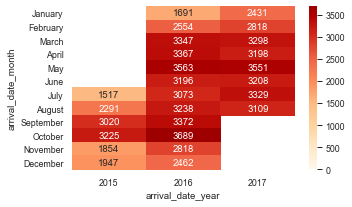

In [20]:
#which month and year has the most booking?
bookings = booking_data[booking_data['is_canceled']==0].pivot_table(index='arrival_date_month', columns='arrival_date_year', values='hotel', aggfunc=len, fill_value=0)
bookings.index = pd.CategoricalIndex(bookings.index, categories=['January', 'February', 'March', 'April','May','June','July', 'August','September', 'October', 'November', 'December'], ordered=True)
bookings = bookings.sort_index()
mask = np.array([[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]])
f, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(bookings, center=2000, annot=True, mask=mask, fmt="d", ax=ax, cmap="OrRd")
sns.set_context('paper')
plt.show()

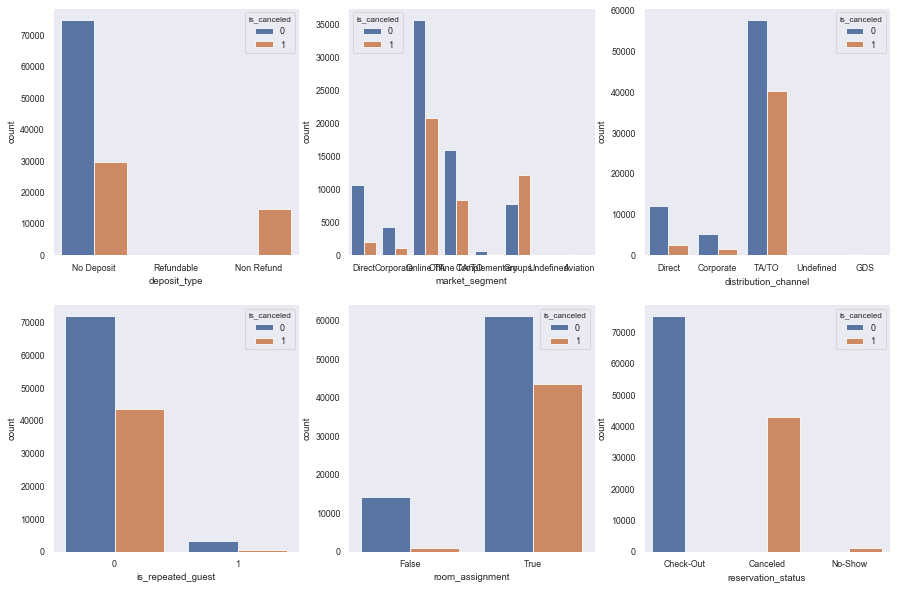

In [77]:
#how cancellation affect other features in the dataset
sns.set_style("dark")
fig, axes = plt.subplots(2, 3, figsize=(15,10))
sns.countplot(data=booking_data, x='deposit_type', hue='is_canceled', ax=axes[0][0])
sns.countplot(data=booking_data, x='market_segment', hue='is_canceled', ax=axes[0][1])
sns.countplot(data=booking_data, x='distribution_channel', hue='is_canceled', ax=axes[0][2])
sns.countplot(data=booking_data, x='is_repeated_guest', hue='is_canceled', ax=axes[1][0])
sns.countplot(data=booking_data, x='room_assignment', hue='is_canceled', ax=axes[1][1])
sns.countplot(data=booking_data, x='reservation_status', hue='is_canceled', ax=axes[1][2])



plt.show()

In [41]:
#Average bill amount = average adr for checked-out bookings * average stay duration
bb= booking_data[booking_data['is_canceled']==0].adr.mean()*booking_data[booking_data['is_canceled']==0].stay_nights.mean()
#Subset of fulfilled bookings = 680
rr = booking_data[(booking_data['stay_nights']==0) & (booking_data['is_canceled']==0)].is_canceled.value_counts()
print('The average amount to be expected from the bookings is $%.2f' %(bb*rr))
booking_data = booking_data[booking_data['stay_nights']!=0]

The average amount to be expected from the bookings is $230697.20


### Machine Learning
import all libraries

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score

### Prepare the inputs
To tackle the model traning part, we need to deal with categorical features, by replacing them with dummy columns. The features at hand are:
hotel, market_segment, distribution_channel, room_assignmnt, deposit_type, is_repeated_guest

In [43]:
bookings = booking_data[['is_canceled', 'lead_time', 'country', 'hotel', 'market_segment', 'distribution_channel', 'room_assignment', 'deposit_type', 'customer_type', 'is_repeated_guest']]
booking_data_dummies=pd.get_dummies(data=bookings, columns=['hotel', 'country', 'market_segment', 'distribution_channel', 'room_assignment', 'deposit_type', 'customer_type', 'is_repeated_guest'])
print(booking_data_dummies.shape)

(118675, 206)


In [44]:
#split into Train and test of data
X = booking_data_dummies.drop(['is_canceled'], axis=1).values
y = booking_data_dummies.is_canceled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

### Prepare the model

In [56]:
#DecisionTreeClassifier
model_t = DecisionTreeClassifier(criterion='entropy', random_state=7)
model_t.fit(X_train, y_train)
y_pred = model_t.predict(X_test)

In [60]:
#save the Model
pickle.dump(model_t,open('model_t.pkl', 'wb'))

In [57]:
#Evaluate Meterics
print('Score :', accuracy_score(y_test, y_pred))

Score : 0.8133584248518383


In [58]:
print('Score :', f1_score(y_test, y_pred))

Score : 0.7360266952687402
